In [11]:
# learn transition for game of life using single hidden layer MLP
import numpy as np

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier

In [35]:
text_file = open("train.txt", "r")
lines = text_file.readlines()
text_file.close()
label = []
target = []
for line in lines:
  [state, a] = line.split("\t")
  s = eval(state)
  the_sum = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  the_sum[int(np.sum(s))] = 1
  for i in range(10):
    s.append(the_sum[i])
  label.append(s)
  target.append(eval(a))
label = np.array(label)
target = np.array(target)

In [37]:
def find_num_correct(N=512):
  classifier = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100,),batch_size=np.minimum(N, 64))
  indices = np.random.choice(512, N, replace=False)
  classifier.fit(label[indices], target[indices])
  predict = classifier.predict(label)
  return np.sum(predict == target)

In [38]:
find_num_correct(512)

512

In [41]:
find_num_correct(100)

510

In [59]:
round_factor = 1
sample_sizes = np.arange(int(512/round_factor))*round_factor+round_factor

In [60]:
num_correct = []
for sample_size in sample_sizes:
  nums = []
  for i in range(round_factor):
    num = find_num_correct(sample_size)
    nums.append(num)
  avg_num = np.mean(nums)
  print(sample_size, avg_num)
  num_correct.append(avg_num)

1 372.0
2 358.0
3 372.0
4 372.0
5 385.0
6 407.0
7 371.0
8 391.0
9 411.0
10 362.0
11 391.0
12 409.0
13 386.0
14 447.0
15 472.0
16 437.0
17 441.0
18 450.0
19 432.0
20 454.0
21 428.0
22 447.0
23 443.0
24 446.0
25 466.0
26 483.0
27 449.0
28 479.0
29 465.0
30 482.0
31 455.0
32 498.0
33 472.0
34 461.0
35 455.0
36 485.0
37 444.0
38 493.0
39 477.0
40 470.0
41 469.0
42 502.0
43 497.0
44 511.0
45 473.0
46 493.0
47 472.0
48 453.0
49 497.0
50 465.0
51 504.0
52 505.0
53 505.0
54 496.0
55 511.0
56 471.0
57 497.0
58 488.0
59 503.0
60 499.0
61 503.0
62 506.0
63 503.0
64 508.0
65 487.0
66 506.0
67 510.0
68 479.0
69 482.0
70 477.0
71 510.0
72 507.0
73 509.0
74 501.0
75 512.0
76 512.0
77 506.0
78 510.0
79 510.0
80 508.0
81 510.0
82 507.0
83 509.0
84 511.0
85 505.0
86 510.0
87 512.0
88 510.0
89 511.0
90 510.0
91 511.0
92 509.0
93 512.0
94 505.0
95 512.0
96 510.0
97 493.0
98 510.0
99 510.0
100 510.0
101 510.0
102 505.0
103 510.0
104 510.0
105 512.0
106 510.0
107 511.0
108 505.0
109 510.0
110 509.0
111 511.

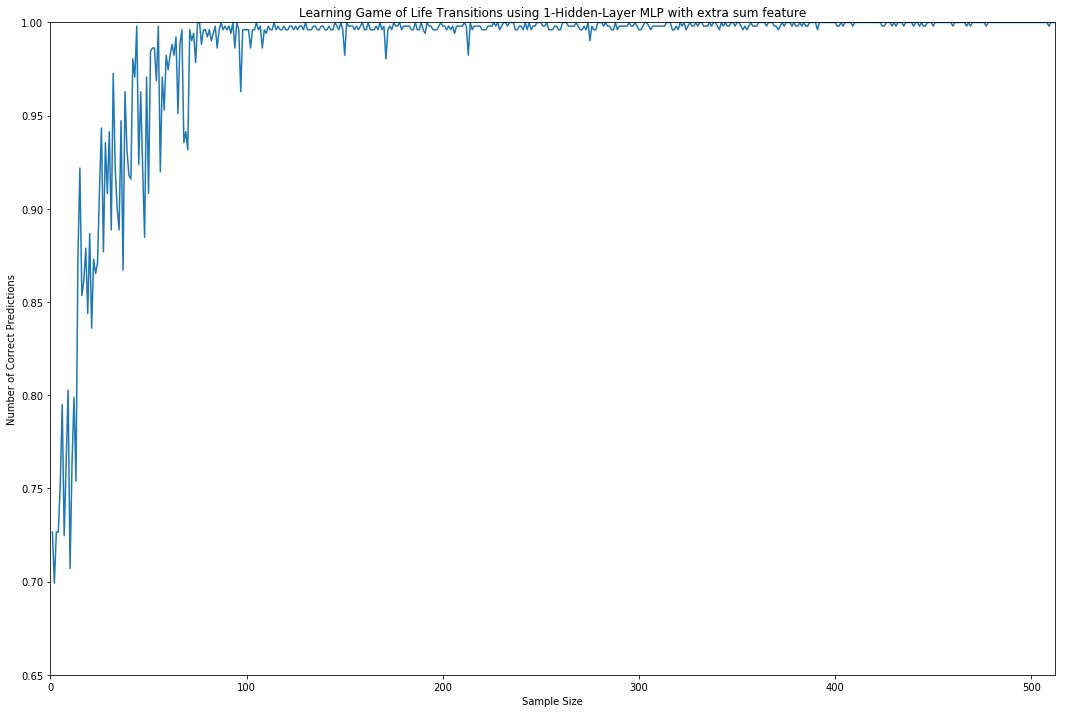

In [63]:
plt.rcParams['figure.figsize'] = [18, 12]
plt.plot(sample_sizes, np.array(num_correct)/512.)
plt.axis([0, 512, 0.65, 1.0])
plt.xlabel('Sample Size')
plt.ylabel('Number of Correct Predictions')
plt.title('Learning Game of Life Transitions using 1-Hidden-Layer MLP with extra sum feature')
plt.show()